In [2]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Delhi Air Quality Project - Starting Analysis")

Delhi Air Quality Project - Starting Analysis


In [3]:
# Loading AQI data
aqi_df = pd.read_csv('../data/raw/aqi.csv')
print("Data Loaded Successfully - Here are the columns:")
print(aqi_df.columns)


Data Loaded Successfully - Here are the columns:
Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')


In [4]:
delhi_aqi = (
    aqi_df[
        aqi_df['state']
        .str.contains('delhi', case=False, na=False)
    ]
    .reset_index(drop=True)
)

# Preprocess date column and sort by date

delhi_aqi['date'] = pd.to_datetime(delhi_aqi['date'], format='%d-%m-%Y')
delhi_aqi = delhi_aqi.sort_values(by='date').reset_index(drop=True)

#handle missing values
print("missing values in delhi_aqi:", delhi_aqi.isnull().sum())

delhi_aqi['aqi_value'] = pd.to_numeric(delhi_aqi['aqi_value'], errors='coerce')
delhi_aqi = delhi_aqi.dropna(subset=['aqi_value'])

#check for duplicates
print("Duplicates in delhi_aqi:", delhi_aqi.duplicated().sum())

#removing unnecessary columns
delhi_aqi = delhi_aqi.drop(columns=['note'])



missing values in delhi_aqi: date                                0
state                               0
area                                0
number_of_monitoring_stations       0
prominent_pollutants                0
aqi_value                           0
air_quality_status                  0
unit                                0
note                             1125
dtype: int64
Duplicates in delhi_aqi: 0


In [5]:
print("\nAQI Data Summary:")


print(f"   AQI data: {delhi_aqi['date'].min().date()} to {delhi_aqi['date'].max().date()}")
print(f"   Total days: {len(aqi_df)}")
print(f"   Columns: {aqi_df.columns.tolist()}")
print("\nSample Data:")
print(aqi_df.head())
print(aqi_df.describe())

#Saving cleaned AQI data
delhi_aqi.to_csv('../data/processed/delhi_aqi_cleaned.csv', index=False)
print("Cleaned Delhi AQI data saved to '../data/processed/delhi_aqi_cleaned.csv'")


AQI Data Summary:
   AQI data: 2022-04-01 to 2025-04-30
   Total days: 235785
   Columns: ['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit', 'note']

Sample Data:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61   

In [6]:
# Loading weather data
weather_df = pd.read_csv('../data/raw/weather.csv')

weather_df.columns = [col.split(' (')[0] if '(' in col else col for col in weather_df.columns]

# Rename for simplicity
weather_df = weather_df.rename(columns={
    'time': 'date',
    'windspeed_10m_max': 'wind_speed_kmh',
    'precipitation_sum': 'precipitation_mm',
    'relative_humidity_2m_mean': 'humidity_percent'
})

#handle missing values
print("missing values in weather_df:", weather_df.isnull().sum())   

#check for duplicates
print("Duplicates in weather_df:", weather_df.duplicated().sum())

# Preprocess date column and sort by date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.sort_values('date').reset_index(drop=True)

# Convert wind speed from km/h to m/s (standard for pollution studies)
weather_df['wind_speed'] = weather_df['wind_speed_kmh'] * 0.27778
weather_df = weather_df.drop(columns=['wind_speed_kmh'])

missing values in weather_df: date                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_mm       0
wind_speed_kmh         0
humidity_percent       0
dtype: int64
Duplicates in weather_df: 0


In [7]:
print("\nWeather Data Summary:")


print(f"   Weather data: {weather_df['date'].min().date()} to {weather_df['date'].max().date()}")
print(f"   Total days: {len(weather_df)}")
print(f"   Columns: {weather_df.columns.tolist()}")
print("\nSample Data:")
print(aqi_df.head())
print(aqi_df.describe())

#Saving cleaned weather data
weather_df.to_csv('../data/processed/delhi_weather_cleaned.csv', index=False)
print("Cleaned Delhi weather data saved to '../data/processed/delhi_weather_cleaned.csv'")


Weather Data Summary:
   Weather data: 2022-04-01 to 2025-04-30
   Total days: 1126
   Columns: ['date', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed']

Sample Data:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61 

In [8]:
# . MERGE DATASETS
print("\n3. Merging AQI + Weather data...")
merged = pd.merge(delhi_aqi, weather_df, on='date', how='inner')

print(f"   Merged days: {len(merged)}")
print(f"   Common period: {merged['date'].min().date()} to {merged['date'].max().date()}")

print(f" Original shape of Merged Dataset: {merged.shape}")
print("\nOriginal columns:")
print(merged.columns.tolist())

# Check for missing data
missing_cols = merged.isnull().sum()
if missing_cols.sum() > 0:
    print(f"Missing values:\n{missing_cols[missing_cols > 0]}")
else:
    print("No missing values!")

# Rename columns for clarity

merged = merged.rename(columns={
    'aqi_value': 'AQI',  
    'air_quality_status': 'aqi_category',
})


# cleaning the 'unit' column (it's messy)

print("\nUnique values in 'unit' column:")
print(merged['unit'].unique())

# It appears to be static
if merged['unit'].nunique() == 1:  # If all values are the same
    merged = merged.drop(columns=['unit'])
    print("Dropped 'unit' column (redundant)")

# Extract individual pollutants from the string
def extract_pollutants(pollutant_str):
    """Extract list of pollutants from comma-separated string"""
    if pd.isna(pollutant_str):
        return []
    return [p.strip() for p in pollutant_str.split(',')]

merged['pollutants_list'] = merged['prominent_pollutants'].apply(extract_pollutants)
merged['pollutants_list'].head()

# Create binary columns for each pollutant
all_pollutants = set()
for pollutants in merged['pollutants_list']:
    all_pollutants.update(pollutants)

print(f"\nUnique pollutants found: {all_pollutants}")

# Create indicator columns
for pollutant in all_pollutants:
    merged[f'has_{pollutant}'] = merged['pollutants_list'].apply(lambda x: pollutant in x)
print("\nCreated binary columns for each pollutant.")


print("\nFinal columns after processing:")
print(merged.columns.tolist())



3. Merging AQI + Weather data...
   Merged days: 1125
   Common period: 2022-04-01 to 2025-04-30
 Original shape of Merged Dataset: (1125, 14)

Original columns:
['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed']
No missing values!

Unique values in 'unit' column:
['number_of_monitoring_stations in Absolute Number, aqi_value in Indices']
Dropped 'unit' column (redundant)

Unique pollutants found: {'PM2.5', 'O3', 'NO2', 'PM10', 'CO'}

Created binary columns for each pollutant.

Final columns after processing:
['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'AQI', 'aqi_category', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed', 'pollutants_list', 'has_PM2.5', 'has_O3', 'has_NO2', 'has_PM10

In [9]:
#Adding time based features:

merged['date'] = pd.to_datetime(merged['date'])
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['day_of_week'] = merged['date'].dt.dayofweek  
merged['is_weekend'] = merged['day_of_week'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday


# Add seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

merged['season'] = merged['month'].apply(get_season)

In [10]:
# Reorder columns logically
column_order = [
    'date', 'year', 'month', 'season', 'day_of_week', 'is_weekend',
    'state', 'area', 'number_of_monitoring_stations',
    'AQI', 'aqi_category',
    'prominent_pollutants', 'pollutants_list',
    'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
    'precipitation_mm', 'humidity_percent', 'wind_speed'
] + [f'has_{p}' for p in all_pollutants]

# Select and reorder
df_clean = merged[column_order]

print("\nFinal cleaned dataset columns:")
print(df_clean.columns.tolist())

# Save cleaned version
df_clean.to_csv('../data/processed/final_delhi_aqi_weather_merged_final.csv', index=False)

print("\n" + "="*50)
print("CLEANING COMPLETE!")
print("="*50)
print(f"\nColumns: {merged.shape[1]} columns")
print(f"\nNew columns added:")
print(f"- pollutants_list (extracted from string)")
print(f"- has_PM10, has_PM2.5, etc. (indicator columns)")
print(f"- year, month, season, day_of_week, is_weekend")
print(f"- aqi_category (verified/created)")
print(f"\nSaved as 'final_delhi_aqi_weather_merged_final.csv'")



Final cleaned dataset columns:
['date', 'year', 'month', 'season', 'day_of_week', 'is_weekend', 'state', 'area', 'number_of_monitoring_stations', 'AQI', 'aqi_category', 'prominent_pollutants', 'pollutants_list', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed', 'has_PM2.5', 'has_O3', 'has_NO2', 'has_PM10', 'has_CO']

CLEANING COMPLETE!

Columns: 24 columns

New columns added:
- pollutants_list (extracted from string)
- has_PM10, has_PM2.5, etc. (indicator columns)
- year, month, season, day_of_week, is_weekend
- aqi_category (verified/created)

Saved as 'final_delhi_aqi_weather_merged_final.csv'


In [11]:
import numpy as np

def detect_outliers_iqr(series):
    """Detect outliers using IQR method"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

print("Potential Outliers Detection:")

# Check AQI
aqi_outliers = detect_outliers_iqr(merged['AQI'])
print(f"AQI outliers: {len(aqi_outliers)} values")
if len(aqi_outliers) > 0:
    print(f"  Range: {aqi_outliers.min():.0f} to {aqi_outliers.max():.0f}")
    print(f"  Likely events: {'Diwali/Stubble burning' if aqi_outliers.max() > 350 else 'Sensor errors'}")

# Check temperature
temp_outliers = detect_outliers_iqr(merged['temperature_2m_mean'])
print(f"\nTemperature outliers: {len(temp_outliers)} values")

# Check wind
wind_outliers = detect_outliers_iqr(merged['wind_speed'])
print(f"Wind speed outliers: {len(wind_outliers)} values")

Potential Outliers Detection:
AQI outliers: 0 values

Temperature outliers: 0 values
Wind speed outliers: 16 values


In [12]:
# wind outliers
Q1 = merged['wind_speed'].quantile(0.25)
Q3 = merged['wind_speed'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

wind_outliers = merged[merged['wind_speed'] > upper_bound]

print("Wind Speed Outliers Analysis:")
print("=" * 50)
print(f"Wind speed IQR range: {Q1:.2f} - {Q3:.2f} m/s")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound:.2f} m/s")
print(f"Number of outliers: {len(wind_outliers)}")
print(f"\nOutlier wind speed range: {wind_outliers['wind_speed'].min():.2f} to {wind_outliers['wind_speed'].max():.2f} m/s")

# Check dates of high wind events
print("\nDates of highest wind events:")
wind_outliers_sorted = wind_outliers.sort_values('wind_speed', ascending=False)
print(wind_outliers_sorted[['date', 'wind_speed', 'season', 'AQI']].head(10))

Wind Speed Outliers Analysis:
Wind speed IQR range: 3.06 - 5.14 m/s
Upper bound (Q3 + 1.5*IQR): 8.26 m/s
Number of outliers: 16

Outlier wind speed range: 8.33 to 10.03 m/s

Dates of highest wind events:
          date  wind_speed   season  AQI
421 2023-05-27   10.027858   Summer  110
723 2024-03-24    9.805634   Summer  194
52  2022-05-23    9.527854   Summer  136
701 2024-03-02    9.277852   Summer  117
756 2024-04-26    9.138962   Summer  195
144 2022-08-23    9.083406  Monsoon   83
137 2022-08-16    9.000072  Monsoon   63
810 2024-06-19    8.916738   Summer  306
59  2022-05-30    8.888960   Summer  201
805 2024-06-14    8.750070   Summer  189


In [13]:
wind_outliers['wind_speed_kmh'] = wind_outliers['wind_speed'] * 3.6

print("\nWind Speed in Different Units:")
print(f"Max wind speed: {wind_outliers['wind_speed'].max():.1f} m/s = {wind_outliers['wind_speed'].max() * 3.6:.1f} km/h")

# Check Beaufort Scale classification
def get_beaufort_scale(wind_ms):
    """Classify wind speed using Beaufort Scale"""
    if wind_ms < 0.5: return "Calm"
    elif wind_ms < 1.5: return "Light Air"
    elif wind_ms < 3.3: return "Light Breeze"
    elif wind_ms < 5.5: return "Gentle Breeze"
    elif wind_ms < 8.0: return "Moderate Breeze"
    elif wind_ms < 10.8: return "Fresh Breeze"
    elif wind_ms < 13.9: return "Strong Breeze"
    elif wind_ms < 17.2: return "Near Gale"
    elif wind_ms < 20.8: return "Gale"
    elif wind_ms < 24.5: return "Strong Gale"
    else: return "Storm"

wind_outliers['beaufort_scale'] = wind_outliers['wind_speed'].apply(get_beaufort_scale)
print(f"\nBeaufort Scale classification:")
print(wind_outliers['beaufort_scale'].value_counts())


Wind Speed in Different Units:
Max wind speed: 10.0 m/s = 36.1 km/h

Beaufort Scale classification:
beaufort_scale
Fresh Breeze    16
Name: count, dtype: int64


/var/folders/71/v9w4t6157v73yy5d5knb3xh40000gn/T/ipykernel_2195/1614328259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_outliers['wind_speed_kmh'] = wind_outliers['wind_speed'] * 3.6
/var/folders/71/v9w4t6157v73yy5d5knb3xh40000gn/T/ipykernel_2195/1614328259.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_outliers['beaufort_scale'] = wind_outliers['wind_speed'].apply(get_beaufort_scale)


In [14]:
# When do these high winds occur in what season and month?
print("\nSeasonal Distribution of High Wind Days:")
print("-" * 40)


print(wind_outliers['season'].value_counts())

print("\nMonthly Distribution:")
print("-" * 20)
monthly_wind = wind_outliers.groupby('month').size()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for month_idx in monthly_wind.index:
    print(f"{months[month_idx-1]}: {monthly_wind[month_idx]} days")


Seasonal Distribution of High Wind Days:
----------------------------------------
season
Summer     12
Monsoon     4
Name: count, dtype: int64

Monthly Distribution:
--------------------
Mar: 2 days
Apr: 1 days
May: 3 days
Jun: 6 days
Aug: 3 days
Sep: 1 days


In [15]:
# Checking if high wind days are also rainy days
print("\nHigh Wind Days - Weather Conditions:")
print("-" * 40)

wind_outliers['is_rainy'] = wind_outliers['precipitation_mm'] > 0
rainy_high_wind = wind_outliers['is_rainy'].sum()
print(f"High wind days with rain: {rainy_high_wind}/{len(wind_outliers)} ({rainy_high_wind/len(wind_outliers)*100:.0f}%)")

# Checking AQI on high wind days
print(f"\nAQI on high wind days:")
print(f"  Average: {wind_outliers['AQI'].mean():.0f}")
print(f"  Range: {wind_outliers['AQI'].min():.0f} - {wind_outliers['AQI'].max():.0f}")

# Compare with normal wind days
normal_wind_days = merged[merged['wind_speed'] <= upper_bound]
print(f"\nComparison - AQI on normal vs high wind days:")
print(f"  Normal wind days: {normal_wind_days['AQI'].mean():.0f} AQI")
print(f"  High wind days: {wind_outliers['AQI'].mean():.0f} AQI")
print(f"  Difference: {normal_wind_days['AQI'].mean() - wind_outliers['AQI'].mean():.0f} AQI")


High Wind Days - Weather Conditions:
----------------------------------------
High wind days with rain: 11/16 (69%)

AQI on high wind days:
  Average: 156
  Range: 58 - 306

Comparison - AQI on normal vs high wind days:
  Normal wind days: 207 AQI
  High wind days: 156 AQI
  Difference: 51 AQI


/var/folders/71/v9w4t6157v73yy5d5knb3xh40000gn/T/ipykernel_2195/2867076264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_outliers['is_rainy'] = wind_outliers['precipitation_mm'] > 0


In [16]:
# flag them as "high wind events"
merged['wind_category'] = 'normal'
merged.loc[merged['wind_speed'] > upper_bound, 'wind_category'] = 'high_wind_event'

print(merged['wind_category'].value_counts())

wind_category
normal             1109
high_wind_event      16
Name: count, dtype: int64


### Interpretation: What Happens on High Wind Days?

From the analysis, it is clear that high wind days are usually linked with rainy weather. Around **69% of high wind days had rainfall**, which shows that these wind events mostly happen due to proper weather systems and not random noise in the data.

When we look at air quality, the **average AQI on high wind days is 156**, which is much lower than the **average AQI on normal wind days (207)**. This gives a clear difference of **about 51 AQI points**.

This makes sense because **strong winds help in spreading out pollutants**, and rain further helps by washing pollutants out of the air. Even though AQI can sometimes go high on windy days, overall the air quality is noticeably better compared to normal days.

So, we can say that **high wind (especially with rain) generally improves air quality**, and these wind outliers represent natural weather effects rather than data errors. so just flagging them in terms of "high wind events" is a good way to handle them in our analysis.


In [17]:
# --------------------------------------------------------------------
# 1. BASIC STATISTICS
# --------------------------------------------------------------------
print("\n" + "="*50)
print("1. BASIC STATISTICS")
print("="*50)

# AQI Statistics
aqi_stats = merged['AQI'].describe()
print(f"\n AQI Statistics:")
print(f"   Average: {aqi_stats['mean']:.0f}")
print(f"   Minimum: {aqi_stats['min']:.0f} (Best day)")
print(f"   Maximum: {aqi_stats['max']:.0f} (Worst day)")
print(f"   Standard Deviation: {aqi_stats['std']:.0f}")

# Weather Statistics
print(f"\n Weather Statistics:")
if 'temperature_2m_mean' in merged.columns:
    print(f"   Avg Temperature: {merged['temperature_2m_mean'].mean():.1f}°C")
    print(f"   Range: {merged['temperature_2m_mean'].min():.1f}°C to {merged['temperature_2m_mean'].max():.1f}°C")

if 'wind_speed_ms' in merged.columns:
    print(f"   Avg Wind Speed: {merged['wind_speed_ms'].mean():.1f} m/s")
elif 'wind_speed_kmh' in merged.columns:
    merged['wind_speed_ms'] = merged['wind_speed_kmh'] * 0.27778
    print(f"   Avg Wind Speed: {merged['wind_speed_ms'].mean():.1f} m/s (converted from km/h)")

if 'precipitation_mm' in merged.columns:
    rainy_days = (merged['precipitation_mm'] > 0).sum()
    print(f"   Rainy Days: {rainy_days} ({rainy_days/len(merged)*100:.1f}% of days)")
    print(f"   Max Daily Rain: {merged['precipitation_mm'].max():.1f} mm")

if 'humidity_percent' in merged.columns:
    print(f"   Avg Humidity: {merged['humidity_percent'].mean():.0f}%")


1. BASIC STATISTICS

 AQI Statistics:
   Average: 206
   Minimum: 44 (Best day)
   Maximum: 494 (Worst day)
   Standard Deviation: 101

 Weather Statistics:
   Avg Temperature: 24.9°C
   Range: 8.2°C to 39.2°C
   Rainy Days: 383 (34.0% of days)
   Max Daily Rain: 116.0 mm
   Avg Humidity: 60%


In [18]:
# --------------------------------------------------------------------
#  VISUALIZATIONS
# --------------------------------------------------------------------

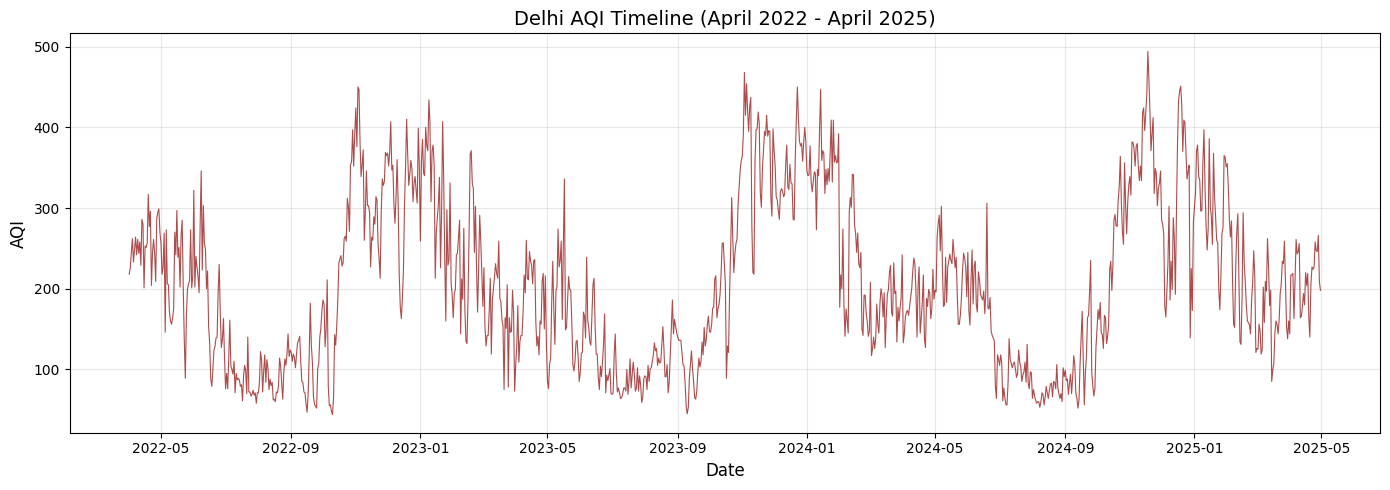

In [19]:
# Chart 1: AQI Over time (time series)

plt.figure(figsize=(14,5))
plt.plot(merged['date'],merged["AQI"], linewidth=0.8, color='darkred', alpha=0.7)
plt.title("Delhi AQI Timeline (April 2022 - April 2025)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI',fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/01_aqi_timeline.png', dpi=300, bbox_inches='tight')


### Chart 1: Delhi AQI Timeline (2022–2025)

**Key observations**
- Sharp AQI spikes occur mainly during winter months (Nov–Jan)
- Monsoon months show consistently lower AQI levels
- Pollution peaks repeat annually, indicating seasonality


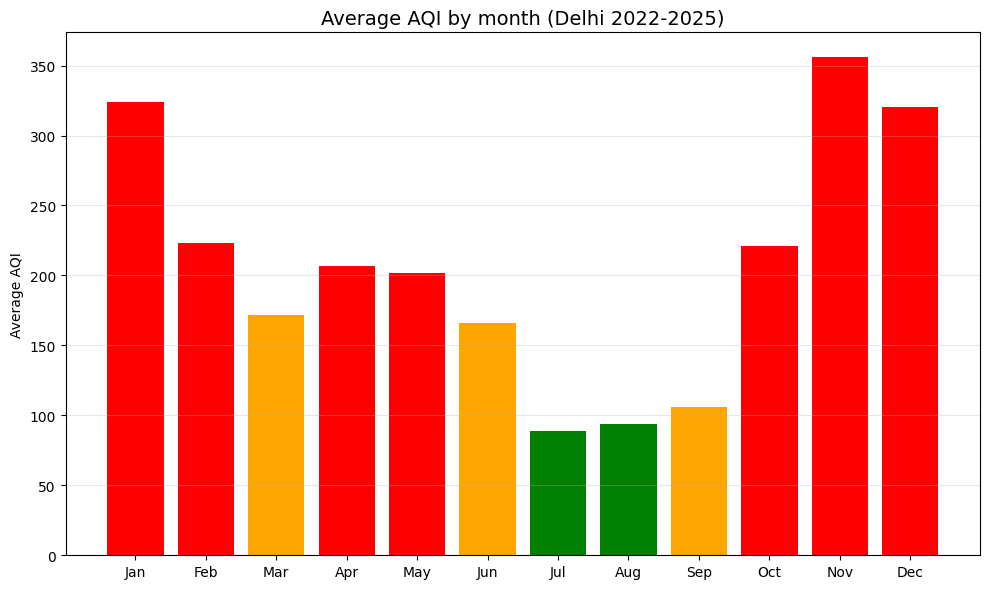

In [20]:
# Chart 2: Monthly Average 

monthly_avg = merged.groupby("month")["AQI"].mean()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

colors = ['green' if x<=100 else 'orange' if x<=200 else 'red' for x in monthly_avg]

plt.figure(figsize=(10,6))
plt.bar(monthly_avg.index, monthly_avg.values, color=colors )
plt.xticks(range(1,13),months)
plt.title('Average AQI by month (Delhi 2022-2025)',fontsize=14)
plt.ylabel('Average AQI',fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/outputs/02_monthly_averages.png', dpi=300)






### Chart 2: Monthly Average AQI

**Key observations**
- November, December, and January have the highest average AQI
- July and August show the lowest AQI levels
- Winter months consistently fall in poor to severe categories


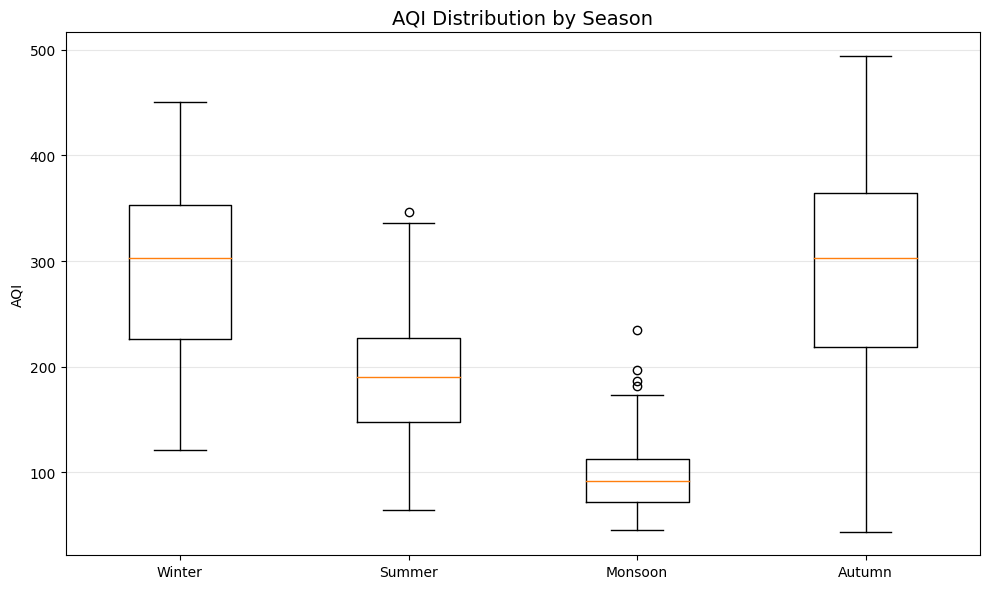

In [21]:
# Chart 3: Seasonal Boxplots

plt.figure(figsize=(10,6))
season_order = ['Winter','Summer','Monsoon','Autumn']



#building data using the present seasons
season_data = [
    merged[merged['season'] == s]['AQI'].values
    for s in season_order
]

plt.boxplot(season_data, labels=season_order)
plt.title('AQI Distribution by Season', fontsize=14)
plt.ylabel('AQI')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/outputs/03_seasonal_boxplots.png', dpi=300)


### Chart 3: AQI Distribution by Season

**Key observations**
- Winter has the highest median AQI and largest variability
- Monsoon shows the lowest and most stable AQI
- Autumn shows increasing AQI with high variability



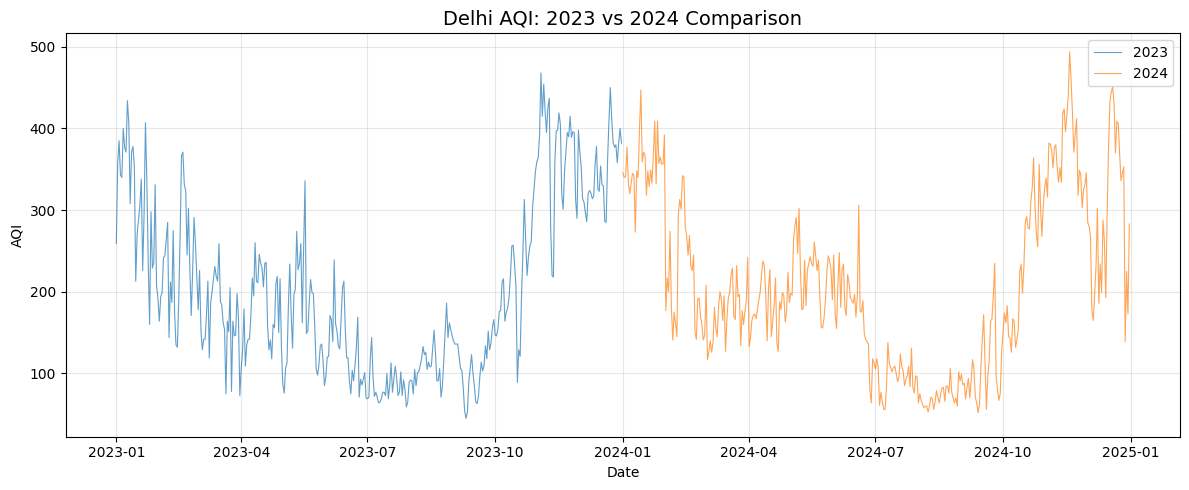

In [ ]:
# Chart 4: 2023 vs 2024 AQI Comparison

df_2023 = merged[merged['year'] == 2023]
df_2024 = merged[merged['year'] == 2024]

plt.figure(figsize=(12, 5))
plt.plot(df_2023['date'], df_2023['AQI'], label='2023', alpha=0.7, linewidth=0.8)
plt.plot(df_2024['date'], df_2024['AQI'], label='2024', alpha=0.7, linewidth=0.8)
plt.title('Delhi AQI: 2023 vs 2024 Comparison', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/04_2023_vs_2024.png', dpi=300)

### Chart 4: AQI Comparison Between 2023 and 2024

**Key observations**
- Both years follow similar seasonal patterns
- 2024 shows slightly lower peaks during winter
- Differences between years are marginal


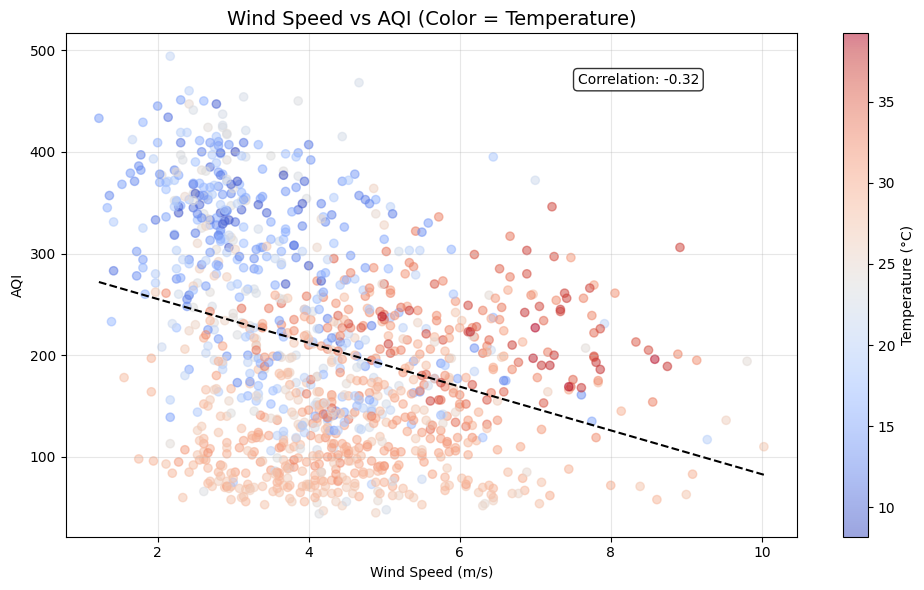

In [23]:
#Chart 5: Wind vs AQI

plt.figure(figsize=(10, 6))
plt.scatter(merged['wind_speed'], merged['AQI'], alpha=0.5, c=merged['temperature_2m_mean'], cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('AQI')
plt.title('Wind Speed vs AQI (Color = Temperature)', fontsize=14)

# Add trend line and correlation
z = np.polyfit(merged['wind_speed'].dropna(), merged['AQI'].dropna(), 1)
p = np.poly1d(z)
plt.plot(sorted(merged['wind_speed'].dropna()), p(sorted(merged['wind_speed'].dropna())), 'k--')
corr = merged['wind_speed'].corr(merged['AQI'])
plt.text(0.7, 0.9, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/05_wind_vs_aqi.png', dpi=300)

### Chart 5: Wind Speed vs AQI

**Key observations**
- AQI generally decreases as wind speed increases
- Correlation between wind speed and AQI is negative
- High wind speeds are associated with better air quality



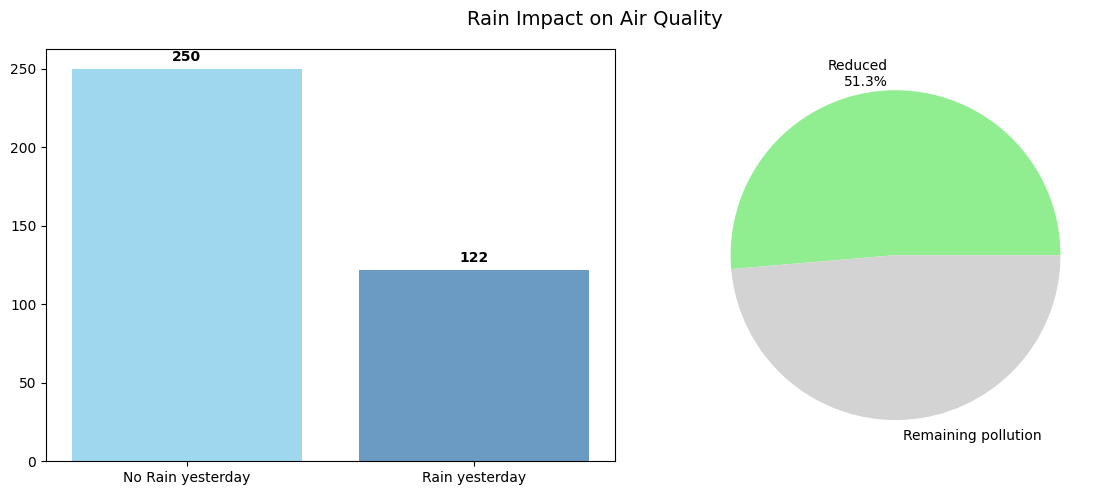

In [ ]:
# Chart 6: Rain Impact

merged['rain_today'] = merged['precipitation_mm'] > 0
merged['rain_yesterday'] = merged['precipitation_mm'].shift(1) > 0

rain_effect = merged.groupby('rain_yesterday')["AQI"].agg(["mean","std","count"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


#6A: Average AQI comparison

axes[0].bar(['No Rain yesterday','Rain yesterday'],rain_effect['mean'],color=['skyblue','steelblue'],alpha=0.8 )
for i, v in enumerate(rain_effect['mean']):
    axes[0].text(i,v+5 , f'{v:.0f}', ha='center', fontweight='bold')

#6B: Percentage of AQI reduction after rain

reduction_pct = (
    (rain_effect.loc[False,'mean'] - rain_effect.loc[True, 'mean']) / rain_effect.loc[False, 'mean']*100
)

axes[1].pie(
    [reduction_pct, 100 - reduction_pct],
    labels = [f'Reduced\n{reduction_pct:.1f}%','Remaining pollution'],
    colors = ['lightgreen','lightgray']
)

plt.suptitle('Rain Impact on Air Quality', fontsize=14)
plt.tight_layout()
plt.savefig('../data/outputs/06_rain_impact.png', dpi=300)



### Chart 6: Impact of Rain on AQI

**Key observations**
- AQI is lower on days after rainfall
- Rain reduces AQI by a noticeable percentage
- Pollution is reduced but not eliminated



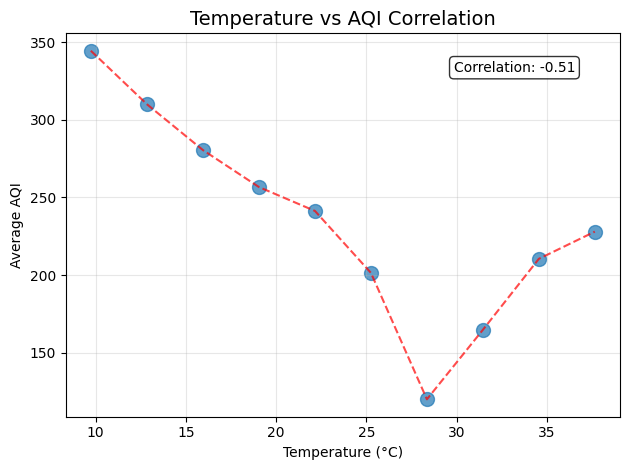

In [ ]:
#Chart 7: AQI vs Temperature

merged['temp_bin'] = pd.cut(merged['temperature_2m_mean'],bins=10)
temp_vs_aqi = merged.groupby('temp_bin')['AQI'].mean().reset_index()
temp_vs_aqi['temp_mid'] = temp_vs_aqi['temp_bin'].apply(lambda x: x.mid)


plt.scatter(
    temp_vs_aqi['temp_mid'],temp_vs_aqi['AQI'], s=100, alpha=0.7
)
plt.plot(
    temp_vs_aqi['temp_mid'],temp_vs_aqi['AQI'],'r--',alpha=0.7
)
plt.xlabel('Temperature (°C)')
plt.ylabel('Average AQI')
plt.title('Temperature vs AQI Correlation', fontsize=14)

temp_corr = merged['temperature_2m_mean'].corr(merged['AQI'])
plt.text( 0.7, 0.9, f'Correlation: {temp_corr:.2f}',
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/07_temp_correlation.png', dpi=300)

### Chart 7: Temperature vs AQI Correlation

**Key observations**
- AQI decreases as temperature increases up to moderate levels
- Very high temperatures show rising AQI again
- Correlation between temperature and AQI is moderately negative
